# **Objective**
The objective of this problem is to predict six target soil properties using machine learning by combining data from two different sensors.To accomplish this task, we will need to preprocess the data by performing data cleaning, normalisation, and feature engineering. Afterward, we will split the data into training and testing sets and train a machine learning model using the training set. We will evaluate the performance of our model using the testing set and tune the model's hyperparameters if necessary. Finally, we will use the trained model to predict the target soil properties on new data.
This is a supervised learning problem since we have labelled data, and we are predicting a continuous output. We can use regression algorithms such as linear regression, decision trees, random forests, or neural networks to train our model. The performance metric we will use to evaluate our model is the mean squared error (MSE) or the R-squared coefficient.




**INSTALLING ALL THE REQUIRED** **LIBRARIES**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense,MaxPooling1D,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, Flatten, GlobalMaxPooling1D, BatchNormalization, MaxPooling1D, GlobalAveragePooling1D, Concatenate
import tensorflow as tf
%matplotlib inline


**CONNECTING WITH GOOGLE DRIVE**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**READING TRAIN DATA** **AS df**

**

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/train_ai.csv')


**EXPLORATORY DATA ANALYSIS**

print first five rows of dataset

In [ ]:
df.head()

,Id,Property_A,Property_B,Property_C,Property_D,Property_E,Property_F,A,B,C,...,2491 nm,2492 nm,2493 nm,2494 nm,2495 nm,2496 nm,2497 nm,2498 nm,2499 nm,2500 nm
0,1,5.99,0.115797,1.638,49.0,19.0,32.0,101745.9975,292211.0199,38816.97313,...,0.385093,0.384933,0.384977,0.385273,0.385507,0.384700,0.383193,0.382067,0.381257,0.381013
1,2,5.15,0.183483,1.482,47.0,16.0,37.0,105712.6402,315908.0751,39888.72776,...,0.404990,0.405053,0.405617,0.406607,0.407490,0.406543,0.404393,0.403207,0.402917,0.402393
2,3,5.55,0.173130,1.404,50.0,20.0,30.0,102621.3309,304334.3675,42120.98104,...,0.397750,0.397417,0.397273,0.397140,0.397013,0.396677,0.396240,0.396140,0.396370,0.397213
3,4,5.09,0.196011,1.638,50.0,15.0,35.0,113446.2881,311356.2657,39195.84181,...,0.382153,0.382130,0.382580,0.383233,0.383877,0.383550,0.382607,0.382263,0.382473,0.382533
4,5,4.73,0.203319,1.677,53.0,19.0,28.0,109714.6033,322110.4501,38347.65382,...,0.416157,0.416683,0.417567,0.417703,0.417420,0.416463,0.415003,0.414080,0.413637,0.413687


Print basic information like rows, datatypes...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 2174 entries, Id to 2500 nm
dtypes: float64(2172), int64(2)
memory usage: 4.1 MB


Sum of all the null values in all the features.No Null values are present in dataset

In [ ]:
df.isnull().sum()

Id            0
Property_A    0
Property_B    0
Property_C    0
Property_D    0
             ..
2496 nm       0
2497 nm       0
2498 nm       0
2499 nm       0
2500 nm       0
Length: 2174, dtype: int64

All columns in dataset .columns will print all columns

In [ ]:
df.columns

Index(['Id', 'Property_A', 'Property_B', 'Property_C', 'Property_D',
       'Property_E', 'Property_F', 'A ', 'B', 'C',
       ...
       '2491 nm', '2492 nm', '2493 nm', '2494 nm', '2495 nm', '2496 nm',
       '2497 nm', '2498 nm', '2499 nm', '2500 nm'],
      dtype='object', length=2174)

.shape will give the rows and columns

In [ ]:
df.shape

(250, 2174)

In [ ]:
df_without_targets= df.drop(['Property_A','Property_B','Property_C','Property_D','Property_E','Property_F'], axis =1)

It is a boxplot of sensor 1 data (A-P). We can see that the data has many outliers present in it.

<Axes: >

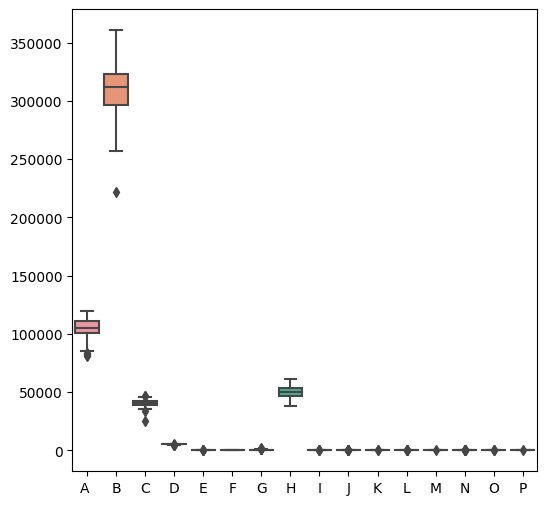

In [ ]:
import matplotlib.pyplot as pp
fig,ax=pp.subplots(1,1,figsize=(6,6))
sns.boxplot(df_without_targets.iloc[:,1:17])
#fig.savefig('sensor1_boxplot.png',transparent=True)

This is a boxplot of 20 spectral reflectance data of sensor 2. We can see that outliers are present and we need to normalise our data for applying models on it .



<Axes: >

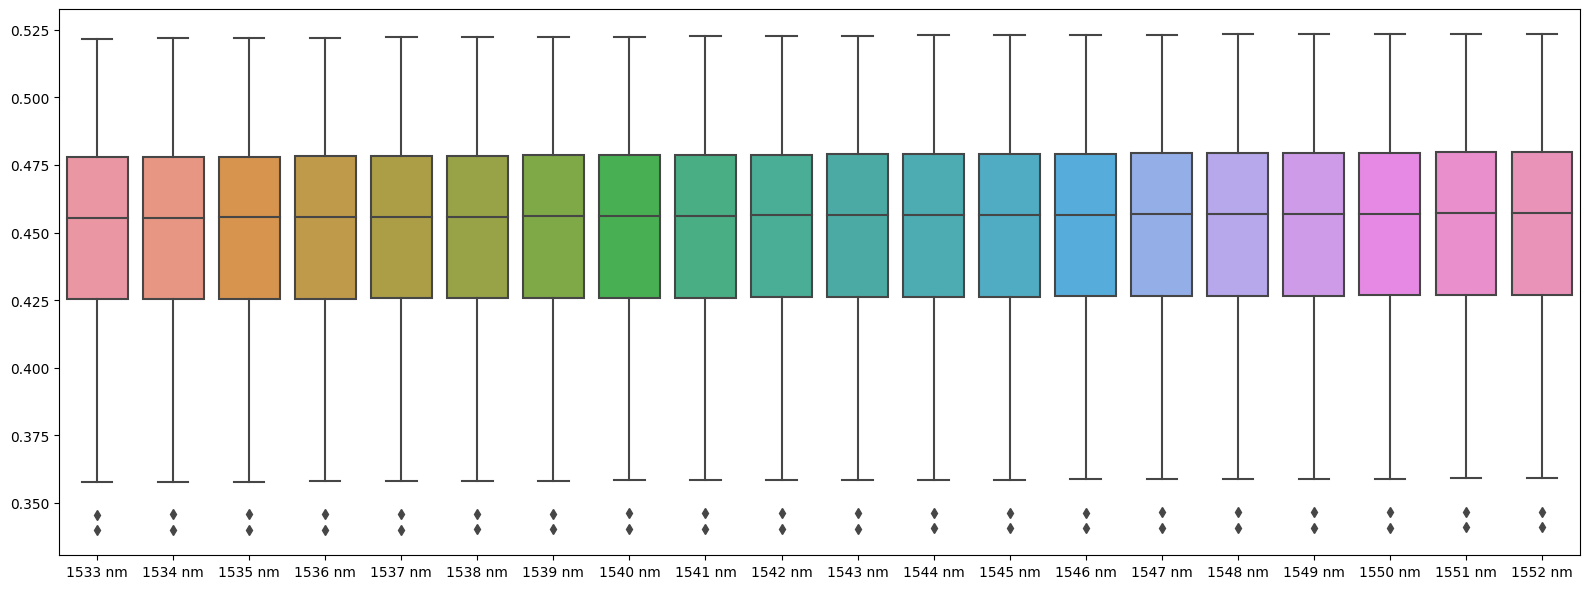

In [ ]:
fig,ax=pp.subplots(1,1,figsize=(16,6), tight_layout = True)
sns.boxplot(df_without_targets.iloc[:,1200:1220])

 This is a displot of sensor1 data.

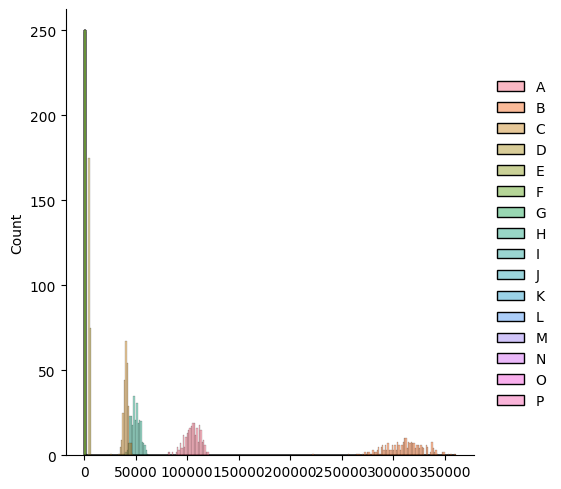

In [ ]:

sns.displot(df_without_targets.iloc[:,1:17])

Heatmap of the six target properties and their correlation with sensor 1 data.



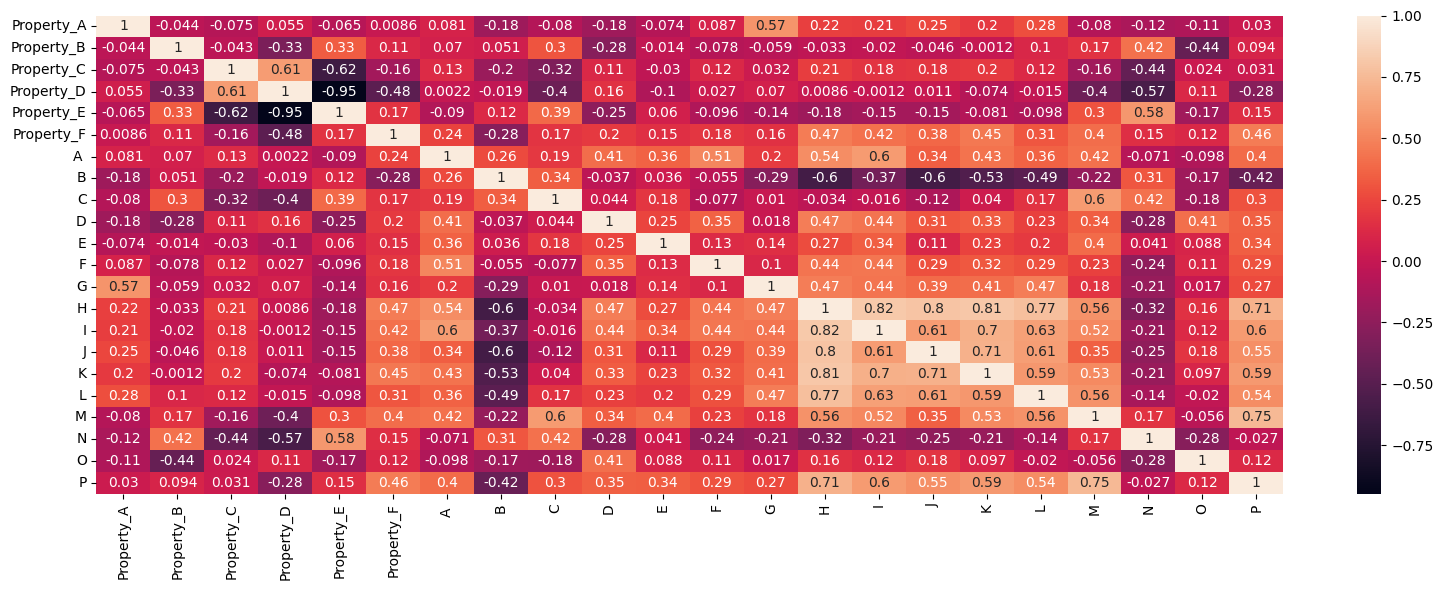

In [ ]:
fig,ax=pp.subplots(1,1,figsize=(16,6), tight_layout = True)
fig = sns.heatmap(df.iloc[:,1:23].corr(), annot = True)

Implementing PCA

In [ ]:

from sklearn.preprocessing import StandardScaler
df_pca2=df.drop(["Id","Property_A","Property_B","Property_C","Property_D","Property_E","Property_F","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"],axis=1)

df_pca2.drop(columns=df_pca2.columns[0], axis=7,  inplace=True)

scaler=StandardScaler()
scaler.fit(df_pca2)
scaled_data=scaler.transform(df_pca2)

from sklearn.decomposition import PCA
pca=PCA(n_components=100)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
pca2=pd.DataFrame(x_pca)
pca2

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report
create_report(pca2)

Applying PCA on the sensor 2 data does not gives us any correlation in the data, but a information of normal distribution with some outliers.

In [ ]:
df_y=pd.DataFrame(zip(df.iloc[:,7],df["B"],df["C"],df["D"],df["E"],df["F"],df["I"],df["F"],df["G"],df["H"],df["I"],df["J"],df["K"],df["L"],df["M"],df["N"],df["O"],df["P"]))

In [ ]:
df_y

In [ ]:
from dataprep.eda import create_report
create_report(df_y)

As most of the values of sensor is more than 100k so we did min max scalar

In [ ]:
for col in df.drop(['Property_A','Property_B','Property_C','Property_D','Property_E','Property_F','Id'],axis='columns').columns:
    df[col] = ((df[col] - df[col].min()) /( df[col].max()-df[col].min()))

After normalizing

In [ ]:
df.head()

,Id,Property_A,Property_B,Property_C,Property_D,Property_E,Property_F,A,B,C,...,2491 nm,2492 nm,2493 nm,2494 nm,2495 nm,2496 nm,2497 nm,2498 nm,2499 nm,2500 nm
0,1,5.99,0.115797,1.638,49.0,19.0,32.0,0.533684,0.505833,0.625350,...,0.630693,0.629010,0.627023,0.627441,0.628474,0.627501,0.625123,0.621392,0.616154,0.613830
1,2,5.15,0.183483,1.482,47.0,16.0,37.0,0.637448,0.676743,0.675570,...,0.727957,0.727350,0.728138,0.732540,0.737435,0.735686,0.729543,0.724826,0.721267,0.716952
2,3,5.55,0.173130,1.404,50.0,20.0,30.0,0.556582,0.593270,0.780168,...,0.692565,0.690024,0.687264,0.685902,0.685507,0.686819,0.689384,0.690250,0.689497,0.691968
3,4,5.09,0.196011,1.638,50.0,15.0,35.0,0.839754,0.643914,0.643103,...,0.616321,0.615308,0.615282,0.617391,0.620395,0.621805,0.622234,0.622354,0.622058,0.621161
4,5,4.73,0.203319,1.677,53.0,19.0,28.0,0.742136,0.721476,0.603359,...,0.782545,0.784193,0.786681,0.787207,0.786654,0.784818,0.781802,0.778028,0.773290,0.771424


.describe evaluate min ,max , standard deviation etc.

In [ ]:
df.describe()

,Id,Property_A,Property_B,Property_C,Property_D,Property_E,Property_F,A,B,C,...,2491 nm,2492 nm,2493 nm,2494 nm,2495 nm,2496 nm,2497 nm,2498 nm,2499 nm,2500 nm
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,...,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02
mean,125.500000,5.662240,0.987865,1.527368,50.163600,20.841200,28.994400,-4.902745e-16,-1.136868e-15,-1.136868e-16,...,2.842171e-16,2.771117e-16,2.486900e-17,-1.215028e-15,6.821210e-16,-1.456613e-15,-2.700062e-16,-9.912071e-16,8.881784e-16,-1.829648e-15
std,72.312977,0.551217,0.872127,0.302409,15.018703,13.394431,4.911086,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,4.600000,0.084781,0.540000,0.100000,10.000000,12.800000,-3.088153e+00,-4.440401e+00,-6.301307e+00,...,-3.343813e+00,-3.332742e+00,-3.312252e+00,-3.285445e+00,-3.261521e+00,-3.272008e+00,-3.306203e+00,-3.335345e+00,-3.361228e+00,-3.390645e+00
25%,63.250000,5.240000,0.292768,1.365000,51.000000,15.000000,26.000000,-6.075044e-01,-6.916682e-01,-5.527053e-01,...,-6.588524e-01,-6.548269e-01,-6.588012e-01,-6.473809e-01,-6.432232e-01,-6.437431e-01,-6.576441e-01,-6.523049e-01,-6.482129e-01,-6.407258e-01
50%,125.500000,5.560000,0.790130,1.560000,54.000000,18.000000,29.000000,4.880424e-02,6.598713e-02,-4.741854e-03,...,1.100013e-01,1.152184e-01,1.206433e-01,1.291223e-01,1.190153e-01,1.190011e-01,1.233525e-01,1.262678e-01,1.270892e-01,1.061192e-01
75%,187.750000,6.017500,1.342725,1.755000,56.000000,20.000000,31.000000,7.379233e-01,6.682605e-01,6.207602e-01,...,7.613212e-01,7.658529e-01,7.619890e-01,7.656622e-01,7.570095e-01,7.616639e-01,7.517195e-01,7.385539e-01,7.343771e-01,7.271504e-01
max,250.000000,7.600000,7.000000,2.262000,69.000000,87.000000,52.100000,1.907259e+00,2.537192e+00,2.655925e+00,...,2.106077e+00,2.105442e+00,2.098334e+00,2.086801e+00,2.074655e+00,2.074241e+00,2.082214e+00,2.095841e+00,2.116148e+00,2.133797e+00


### **To predict muliple target we used make_regression**.The make_regression() function will create a dataset with a linear relationship between inputs and the outputs.First it create synthetic x,y

In [ ]:
x, y = make_regression(n_samples=250, n_features=2167, n_targets=6, random_state=42)

Putting values of x,y from dataframe

In [ ]:
x=df.drop(['Property_A','Property_B','Property_C','Property_D','Property_E','Property_F','Id'],axis='columns')
y=df[['Property_A','Property_B','Property_C','Property_D','Property_E','Property_F']]

Create list of models and dividing dataset into train and test


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)
models = [ ExtraTreesRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          HistGradientBoostingRegressor(),
          AdaBoostRegressor(),
          SVR(),
          CatBoostRegressor(iterations=100),
          XGBRegressor(),
          HuberRegressor(),
          KNeighborsRegressor()
         ]

model_names = [' Extra trees Regressor',
               'Decision Tree',
               'Random Forest',
               'hist gradient'
               'ada boost',
               'SVR',
               'cat',
               'xgb',
               'Huber regression'
               'KNN'
              ]

**Multi-output regression involves predicting two or more numerical variables.Evaluate RMSE,MAE,MSE on all the models which are import above **

In [ ]:


for model, name in zip(models, model_names):
    model = MultiOutputRegressor(model)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    score=model.score(xtest,ytest)
    print('--------------------------------{}---------------------------'.format(model))
    print('mae score for model-{}:{}'.format(name,mae))
    print('mse score for model-{}:{}'.format(name,mse))
    print('model score for model-{}:{}'.format(name,mse**0.5))
    print('model score for model-{}:{}'.format(name,score))


--------------------------------MultiOutputRegressor(estimator=ExtraTreesRegressor())---------------------------
mae score for model- Extra trees Regressor:2.0315335639222227
mse score for model- Extra trees Regressor:17.452269171155695
model score for model- Extra trees Regressor:4.177591312126606
model score for model- Extra trees Regressor:0.3800319852623451
--------------------------------MultiOutputRegressor(estimator=DecisionTreeRegressor())---------------------------
mae score for model-Decision Tree:2.2974852422222223
mse score for model-Decision Tree:26.723734906755016
model score for model-Decision Tree:5.169500450406694
model score for model-Decision Tree:0.0014995500293117174
--------------------------------MultiOutputRegressor(estimator=RandomForestRegressor())---------------------------
mae score for model-Random Forest:2.023579651322222
mse score for model-Random Forest:19.525272076816293
model score for model-Random Forest:4.418741005854076
model score for model-Random 

**Random forest is used to extract all the import feature and sorted from increasing to decreasing order of important feature.C and N are most related according to random forest**

In [ ]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
# Get the feature importances
importances = rf.feature_importances_

# Sort the features by importance
sorted_indices = importances.argsort()[::-1]

# Print the feature importances
for i in sorted_indices:
    print(f"{xtrain.columns[i]}: {importances[i]}")

C: 0.34421147725903367
N: 0.2716372917503818
M: 0.07169460520052738
O: 0.04577561740501724
G: 0.02654571913228934
D: 0.01844686791899465
J: 0.011004810864958615
H: 0.008456956166039092
L: 0.004061818912266389
B: 0.0037539728280383887
A : 0.0036769574067324617
P: 0.0035474920920741306
480 nm: 0.003533852735516184
365 nm: 0.0035222471810787176
422 nm: 0.0034788626328569007
385 nm: 0.00347482171618172
414 nm: 0.003281772401740308
F: 0.0029411905233678
438 nm: 0.002716738496522644
359 nm: 0.0026844661901695988
1518 nm: 0.002596663621443041
389 nm: 0.002469278392114255
417 nm: 0.00245317426597785
380 nm: 0.0023692695551773384
384 nm: 0.0023245621637217107
425 nm: 0.002204291937594561
E: 0.002156590365752939
429 nm: 0.0019861753738655797
468 nm: 0.0019688589335661827
541 nm: 0.001960740406685468
495 nm: 0.0019195533235506726
407 nm: 0.0018790229751927243
350 nm: 0.001857233351487437
469 nm: 0.0017913230937009951
452 nm: 0.0017433455839328447
412 nm: 0.0017328624229976017
1623 nm: 0.001684185

**Converting features into numpy and then reshape to use neural network and target values are converting into numpy array**

In [ ]:

import numpy as np
trainx=x.to_numpy().reshape(250,2167,1)
trainy=y.to_numpy()

**Defining Resnet block and Resnet architecture as most of the values are ranges from 0-1**

In [ ]:


# Define the ResNet architecture
def resnet_block(inputs, filters, kernel_size, strides, activation='relu'):
    x = Conv1D(filters, kernel_size, strides=strides, padding='same',kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)

    x = Conv1D(filters, kernel_size, strides=1, padding='same',kernel_regularizer=regularizers.l2(0.001),)(x)
    x = BatchNormalization()(x)

    # Add the input tensor to the output tensor of the block
    shortcut = Conv1D(filters, 1, strides=strides, padding='same',kernel_regularizer=regularizers.l2(0.001),)(inputs)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x


def resnet(input_shape, num_):
    inputs = Input(shape=input_shape)

    x = Conv1D(64, 2, strides=1, kernel_regularizer=regularizers.l2(0.001), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    for i in range(1,50,2):
      filter=2*(i+0.5)
      x = resnet_block(x, filters=filter,kernel_size=2, strides=1)
    x = GlobalAveragePooling1D()(x)


    outputs = Dense(num_, activation='linear')(x)


    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build and train the model
model = resnet(input_shape=(2167, 1), num_=6)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['RootMeanSquaredError'])

In [ ]:
history=model.fit(trainx, trainy, epochs=50, batch_size=10,validation_split=0.3) #batch-size=10,15 epochs=70,100,50,60

Epoch 1/50
18/18 [==============================] - 97s 457ms/step - loss: 620.3906 - root_mean_squared_error: 24.8327 - val_loss: 719.4876 - val_root_mean_squared_error: 26.7536
Epoch 2/50
18/18 [==============================] - 3s 163ms/step - loss: 521.1058 - root_mean_squared_error: 22.7456 - val_loss: 600.5496 - val_root_mean_squared_error: 24.4295
Epoch 3/50
18/18 [==============================] - 3s 169ms/step - loss: 468.8307 - root_mean_squared_error: 21.5657 - val_loss: 563.4650 - val_root_mean_squared_error: 23.6581
Epoch 4/50
18/18 [==============================] - 3s 155ms/step - loss: 420.6841 - root_mean_squared_error: 20.4187 - val_loss: 537.5319 - val_root_mean_squared_error: 23.1033
Epoch 5/50
18/18 [==============================] - 3s 155ms/step - loss: 373.7567 - root_mean_squared_error: 19.2351 - val_loss: 499.4650 - val_root_mean_squared_error: 22.2642
Epoch 6/50
18/18 [==============================] - 3s 157ms/step - loss: 328.3949 - root_mean_squared_error:

**Defining inception block and implementing as resnet is overfitting to some extent**

In [ ]:

def get_model(input_shape):

    def inception_block(inp, filters):
        reg = "l2"
        bottleneck = Conv1D(filters=filters, kernel_size=1, activation="relu", padding="same", kernel_regularizer=reg)(inp)

        feat1 = Conv1D(filters=filters, kernel_size=3, activation="relu", padding="same", kernel_regularizer=reg)(bottleneck)
        feat2 = Conv1D(filters=filters, kernel_size=7, activation="relu", padding="same", kernel_regularizer=reg)(bottleneck)
        feat3 = Conv1D(filters=filters, kernel_size=15, activation="relu", padding="same", kernel_regularizer=reg)(bottleneck)

        bypass = MaxPooling1D(pool_size=3, strides=1, padding="same")(inp)
        bypass = Conv1D(filters=filters, kernel_size=1, activation="relu", padding="same", kernel_regularizer=reg)(bypass)

        out = Concatenate()([feat1, feat2, feat3, bypass, inp])
        out = BatchNormalization()(out)

        return out

    inp = Input(input_shape)
    x = inp

    x = Conv1D(filters=128, kernel_size=14, activation="relu", padding="same")(x)

    x = inception_block(x, filters=32)

    x = inception_block(x, filters=32)
    x = inception_block(x, filters=64)
    x = MaxPooling1D()(x)
    x = inception_block(x, filters=64)
    x = MaxPooling1D()(x)
    x = inception_block(x, filters=128)
    x = MaxPooling1D()(x)
    x = inception_block(x, filters=128)
    x = MaxPooling1D()(x)
    x = inception_block(x, filters=256)
    x = MaxPooling1D()(x)
    x = inception_block(x, filters=256)
    x = MaxPooling1D()(x)
    x = inception_block(x, filters=512)

    x = GlobalMaxPooling1D()(x)

    dnn = Dropout(0.3)(x)
    dnn = Dense(256, activation="relu", kernel_regularizer="l2")(dnn)
    dnn = Dropout(0.2)(dnn)
    dnn = Dense(64, activation="relu", kernel_regularizer="l2")(dnn)

    output_layer = Dense(6, activation="linear")(dnn)

    model = tf.keras.models.Model(inputs=inp, outputs=output_layer)
    model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['mean_absolute_error','RootMeanSquaredError'])

    return model

input_shape = (2167, 1)
incep = get_model(input_shape)

In [ ]:
history2=incep.fit(trainx, trainy, epochs=70, batch_size=10,validation_split=0.3)

Epoch 1/70
18/18 [==============================] - 28s 265ms/step - loss: 240.9452 - mean_absolute_error: 7.9825 - root_mean_squared_error: 11.7717 - val_loss: 7475.5176 - val_mean_absolute_error: 56.3663 - val_root_mean_squared_error: 85.8677
Epoch 2/70
18/18 [==============================] - 3s 171ms/step - loss: 138.8692 - mean_absolute_error: 4.8044 - root_mean_squared_error: 6.0607 - val_loss: 2216.6025 - val_mean_absolute_error: 31.2288 - val_root_mean_squared_error: 45.9848
Epoch 3/70
18/18 [==============================] - 3s 153ms/step - loss: 132.6853 - mean_absolute_error: 4.3754 - root_mean_squared_error: 5.5507 - val_loss: 935.8402 - val_mean_absolute_error: 18.4939 - val_root_mean_squared_error: 28.8811
Epoch 4/70
18/18 [==============================] - 3s 150ms/step - loss: 128.5151 - mean_absolute_error: 3.9952 - root_mean_squared_error: 5.1885 - val_loss: 549.9294 - val_mean_absolute_error: 11.6225 - val_root_mean_squared_error: 21.1776
Epoch 5/70
18/18 [==========

**Not getting good result from inception **

**BIDIRECTIONAL LSTM - AS their were 2167 feature present in data so implemented bidirectional but not getting good results as compared to ResNet**

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

# Define the input shape of the BiLSTM model
input_shape = (2167, 1)

# Define the model architecture
bilstm = Sequential([
    Bidirectional(LSTM(200, return_sequences=True), input_shape=input_shape),
    Bidirectional(LSTM(100, return_sequences=True)),
    Bidirectional(LSTM(75, return_sequences=True)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Bidirectional(LSTM(25, return_sequences=True)),
    Bidirectional(LSTM(15, return_sequences=True)),
    Bidirectional(LSTM(10)),
    Dense(6, activation='linear')
])

bilstm.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['mean_absolute_error','RootMeanSquaredError'])
bilstm.fit(trainx, trainy, epochs=200, batch_size=10,validation_split=0.3)

Epoch 1/200
18/18 [==============================] - 43s 1s/step - loss: 686.7567 - mean_absolute_error: 17.9946 - root_mean_squared_error: 26.2060 - val_loss: 755.7770 - val_mean_absolute_error: 18.0570 - val_root_mean_squared_error: 27.4914
Epoch 2/200
18/18 [==============================] - 15s 817ms/step - loss: 679.5115 - mean_absolute_error: 17.9359 - root_mean_squared_error: 26.0674 - val_loss: 747.3869 - val_mean_absolute_error: 17.9759 - val_root_mean_squared_error: 27.3384
Epoch 3/200
18/18 [==============================] - 15s 820ms/step - loss: 669.6060 - mean_absolute_error: 17.8578 - root_mean_squared_error: 25.8767 - val_loss: 739.9489 - val_mean_absolute_error: 17.9277 - val_root_mean_squared_error: 27.2020
Epoch 4/200
18/18 [==============================] - 15s 847ms/step - loss: 660.8824 - mean_absolute_error: 17.7899 - root_mean_squared_error: 25.7076 - val_loss: 734.2796 - val_mean_absolute_error: 17.8807 - val_root_mean_squared_error: 27.0976
Epoch 5/200
18/18 [

**SIMPLE RNN - AS data is depended on pattern so there may be pattern so implemented RNN but results are not good compared to ResNet**

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the input shape of the RNN model
input_shape = (2167, 1)

# Define the model architecture
rnn = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=input_shape),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(16),
    Dense(6, activation='linear')
])

rnn.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['mean_absolute_error','RootMeanSquaredError'])
rnn.fit(trainx, trainy, epochs=10, batch_size=10,validation_split=0.3)

Epoch 1/100
18/18 [==============================] - 134s 7s/step - loss: 684.4711 - mean_absolute_error: 17.8984 - root_mean_squared_error: 26.1624 - val_loss: 760.7729 - val_mean_absolute_error: 18.1787 - val_root_mean_squared_error: 27.5821
Epoch 2/100
18/18 [==============================] - 134s 7s/step - loss: 682.8076 - mean_absolute_error: 17.8627 - root_mean_squared_error: 26.1306 - val_loss: 759.6823 - val_mean_absolute_error: 18.1381 - val_root_mean_squared_error: 27.5623
Epoch 3/100
18/18 [==============================] - 129s 7s/step - loss: 680.9692 - mean_absolute_error: 17.8177 - root_mean_squared_error: 26.0954 - val_loss: 752.8260 - val_mean_absolute_error: 17.9366 - val_root_mean_squared_error: 27.4377
Epoch 4/100
18/18 [==============================] - 130s 7s/step - loss: 675.1462 - mean_absolute_error: 17.6779 - root_mean_squared_error: 25.9836 - val_loss: 735.9581 - val_mean_absolute_error: 17.5562 - val_root_mean_squared_error: 27.1285
Epoch 5/100
18/18 [=====

**Reading test file on which prediction has to be made and exploring Dataset**

```
# This is formatted as code
```

**

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/ai.csv')

In [ ]:
df_test.head()

,Id,A,B,C,D,E,F,G,H,I,...,2491 nm,2492 nm,2493 nm,2494 nm,2495 nm,2496 nm,2497 nm,2498 nm,2499 nm,2500 nm
0,1,111184.2421,346946.2804,43356.57078,5164.670838,163.384072,109.192843,461.122552,45783.17392,49.689130,...,0.390053,0.390647,0.391547,0.391620,0.391353,0.391007,0.390543,0.390117,0.389720,0.389410
1,2,105506.8600,309880.1367,44501.70988,5223.016492,173.993427,94.721502,317.640213,50907.18706,43.586957,...,0.394680,0.395323,0.396040,0.395467,0.394440,0.393930,0.393730,0.393800,0.394157,0.395083
2,3,113968.4168,336280.9600,44737.22285,5121.451835,169.749685,101.299384,266.184478,46709.86895,49.689130,...,0.396113,0.395733,0.395470,0.394950,0.394390,0.394030,0.393823,0.393937,0.394363,0.395190
3,4,89953.5665,361447.5617,38306.69505,4831.884516,146.409103,74.987856,271.132144,33103.54427,28.767391,...,0.446693,0.446783,0.447223,0.447357,0.447360,0.447080,0.446593,0.446193,0.445857,0.445790
4,5,107285.1691,319862.5212,45049.53351,5219.775066,163.384072,115.770725,307.744879,48222.54600,44.458696,...,0.349563,0.348673,0.348093,0.348110,0.348467,0.348823,0.349217,0.349270,0.348963,0.349193


In [ ]:
df_test.shape

(101, 2168)

**Selecting all the feature other than ID to make prediction**

In [ ]:
x_test=df_test.drop(['Id'],axis='columns')

**Normalising test data**

In [ ]:
for col in x_test.columns:
    x_test[col] = (x_test[col] - x_test[col].min()) / (x_test[col].max()-x_test[col].min())

**Converting test data into numpy array and reshaping it and then making prediction**

In [ ]:
xtest=x_test.to_numpy()
predictions=model.predict(xtest)

4/4 [==============================] - 4s 354ms/step


In [ ]:
predictions

array([[ 4.540587  ,  0.6088304 ,  1.7073464 , 44.584694  , 15.860892  ,
        25.976757  ],
       [ 4.4879494 ,  0.4564585 ,  1.8616917 , 45.04957   , 16.050482  ,
        26.459099  ],
       [ 4.4840074 ,  0.4867863 ,  1.8316197 , 45.149517  , 16.054867  ,
        26.261818  ],
       [ 4.3895316 ,  0.33958632,  1.9869988 , 45.352222  , 16.134218  ,
        26.48928   ],
       [ 4.7062473 ,  0.8577445 ,  1.4578125 , 43.54042   , 15.499548  ,
        25.65506   ],
       [ 4.5299296 ,  0.49619538,  1.8340613 , 44.764286  , 15.928676  ,
        26.40596   ],
       [ 4.7014656 ,  0.8342765 ,  1.4874688 , 43.437943  , 15.484797  ,
        25.771145  ],
       [ 4.6816273 ,  0.84848756,  1.4693067 , 43.538902  , 15.4991665 ,
        25.593582  ],
       [ 4.570936  ,  0.7199999 ,  1.5795021 , 44.304512  , 15.774826  ,
        25.692455  ],
       [ 4.582737  ,  0.8035266 ,  1.4870611 , 43.919636  , 15.629942  ,
        25.34378   ],
       [ 4.7216115 ,  0.8615554 ,  1.4679277 , 43.

**making dataframe on predictions ,adding ID column,suming the six properties,renaming column name ,droping array column and finally saving it as csv file**

In [ ]:
preds=pd.DataFrame(data=zip(df_test.index+1,predictions))

In [ ]:
preds['Predicted']=preds[1].apply(lambda x:np.sum(x))

In [ ]:
preds=preds.drop(1,axis=1)

In [ ]:
preds.rename(columns={0:'ID'},inplace=True)
preds

,ID,Predicted
0,1,93.279114
1,2,94.365250
2,3,94.268616
3,4,94.691841
4,5,91.716835
...,...,...
96,97,91.192558
97,98,91.440872
98,99,91.254646
99,100,91.370811


In [ ]:
preds.to_csv('AI4.csv',index=False)